## ML_Zoomcamp Homework6 : Dession Trees

###  Dataset : https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Homework link :  https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/06-trees/homework.md

### Import Packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import re 
import warnings
warnings.filterwarnings('ignore')

### Load & read dataset 

In [2]:
!python -m wget  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


Saved under housing.csv


In [3]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df = pd.read_csv('housing.csv')

### EDA

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [7]:
#df = df[(df.ocean_proximity == '<1H OCEAN')].replace('<1H OCEAN', 'i_1H OCEAN')

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Distribution of prices

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

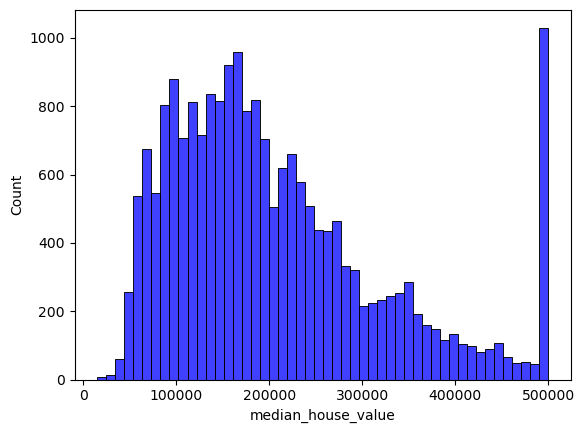

In [9]:
sns.histplot(df.median_house_value, bins=50, color='blue') 

### fill in the missing values with 0

In [10]:
df.total_bedrooms.fillna(0, inplace = True)

#### Apply the log tranform to median_house_value.
#### Do train/validation/test split with 60%/20%/20% distribution.
#### Use the train_test_split function and set the random_state parameter to 1.


In [11]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

#### Use DictVectorizer to turn the dataframe into matrices.

In [12]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)


X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)


In [13]:
dv.get_feature_names()

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

### Let's train a decision tree regressor to predict the median_house_value variable.

### Train a model with max_depth=1.

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [15]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [16]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



### Q1 : Which feature is used for splitting the data
Answer : ocean_proximity=INLAND

### Train a random forest model with these parameters:

n_estimators=10,
random_state=1,
n_jobs=-1

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(round(rmse,2))

0.25


### Q2: What's the RMSE of this model on validation?
Answer : 0.25

### Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.

Set random_state to 1.

Evaluate the model on the validation dataset.

In [21]:
from tqdm.auto import tqdm

In [22]:
scores = []
for n_est in tqdm(range (10,201,10)) :
    rf = RandomForestRegressor(n_estimators=n_est, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((n_est, rmse))

df_score = pd.DataFrame(scores, columns=("n_estimators", "rmse"))
df_score

  0%|          | 0/20 [00:00<?, ?it/s]

,n_estimators,rmse
0,10,0.245738
1,20,0.239262
2,30,0.235717
3,40,0.234583
4,50,0.233104
5,60,0.232843
6,70,0.232384
7,80,0.232527
8,90,0.232215
9,100,0.231968


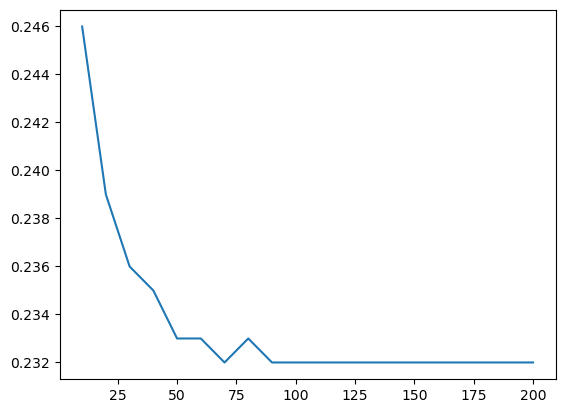

In [23]:
plt.plot(df_score.n_estimators, df_score.rmse.round(3))

### Q3 : After which value of n_estimators does RMSE stop improving?
Answer : 150

### Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]

For each of these values, try different values of n_estimators from 10 till 200 (with step 10)

Fix the random seed: random_state=1

In [24]:
scores = []

for d in tqdm([10, 15, 20, 25]) :
    rf = RandomForestRegressor(n_estimators=10, max_depth=d, random_state=1, n_jobs=-1)
    
    for n_est in tqdm(range (10,201,10)) :
        rf.n_estimators = n_est
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((d, n_est, rmse))

df_score = pd.DataFrame(scores, columns=("max_depth","n_estimators", "rmse"))
df_score        

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

,max_depth,n_estimators,rmse
0,10,10,0.255042
1,10,20,0.252784
2,10,30,0.251647
3,10,40,0.251062
4,10,50,0.250192
...,...,...,...
75,25,160,0.231484
76,25,170,0.231440
77,25,180,0.231598
78,25,190,0.231603


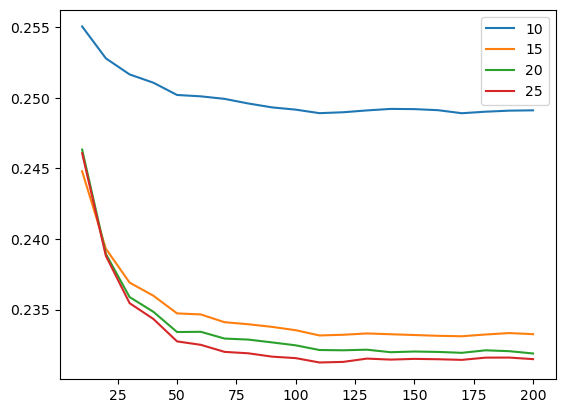

In [25]:
for d in [10, 15, 20, 25]:
    df_subset = df_score[df_score.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()

### Q4 :What's the best max_depth:
Answer : 25

###  Extract feature importance information from tree-based models.
In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

Train the model with these parametes:

n_estimators=10,

max_depth=20,

random_state=1,

n_jobs=-1 (optional)

Get the feature importance information from this model

In [26]:
rf = RandomForestRegressor(n_estimators=n_est, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
rf.feature_importances_

array([1.78387265e-02, 3.43016647e-02, 1.01166816e-01, 9.71423501e-02,
       3.55948175e-01, 2.17654922e-03, 3.14842408e-01, 1.24264462e-04,
       4.43743322e-04, 4.57543751e-03, 3.02773457e-02, 1.89324033e-02,
       2.22301161e-02])

In [27]:
df_importance = pd.DataFrame()
df_importance["Feature"] = dv.get_feature_names()
df_importance["Importance"] = rf.feature_importances_
df_importance

,Feature,Importance
0,households,0.017839
1,housing_median_age,0.034302
2,latitude,0.101167
3,longitude,0.097142
4,median_income,0.355948
5,ocean_proximity=<1H OCEAN,0.002177
6,ocean_proximity=INLAND,0.314842
7,ocean_proximity=ISLAND,0.000124
8,ocean_proximity=NEAR BAY,0.000444
9,ocean_proximity=NEAR OCEAN,0.004575


###  Q5 : What's the most important feature?
Answer : median_income	

###  Now let's train an XGBoost model :

Create DMatrix for train and validation

Create a watchlist

Train a model with these parameters for 100 rounds

In [28]:
import xgboost as xgb

In [29]:

features = dv.get_feature_names()
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<')))
   else col
   for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [30]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [31]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [32]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [33]:
scores = {}
scores['eta=0.3'] = parse_xgb_output(output)
scores['eta=0.3'] 

,num_iter,train_auc,val_auc
0,0,8.12733,8.13245
1,5,1.40218,1.40741
2,10,0.34481,0.35782
3,15,0.23555,0.26044
4,20,0.21580,0.24624
5,25,0.20395,0.24099
6,30,0.19440,0.23741
7,35,0.18637,0.23562
8,40,0.17983,0.23419
9,45,0.17468,0.23279


### Now change eta from 0.3 to 0.1

In [34]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [35]:
scores['eta=0.1'] = parse_xgb_output(output)

(0.2, 0.28)

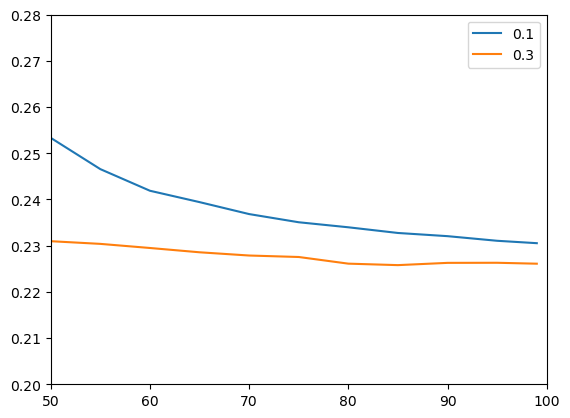

In [36]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()

plt.xlim((50, 100))
plt.ylim((.20, .28))

### Q6 : Which eta leads to the best RMSE score on the validation dataset?
Answer: 0.1